<div style="text-align: center; font-size: 150%; margin-bottom: 20px;">
    <h1 style="color: #9B60A1;">Thyroid Cancer Recurrence EDA and Prediction</h1>
</div>


<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Problem:</font></h2>

This project explores a dataset aimed at predicting well-differentiated thyroid cancer recurrence, featuring 13 clinicopathologic variables from a 15-year longitudinal study. Each patient's data was meticulously collected and monitored over a decade, providing a significant foundation for applying AI to enhance predictive medicine.

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Objective:</font></h2>
    
Our primary goal is to employ machine learning techniques to predict the likelihood of thyroid cancer recurrence, thus facilitating early intervention and personalized patient care. We leverage a variety of classifiers, including Logistic Regression, RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, LGBMClassifier, and CatBoostClassifier, to identify the most accurate predictive model.

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

The strategy encompasses:
1. Exploratory Data Analysis: Analyzing data to uncover trends and patterns.
2. Model Development and Evaluation: Applying and evaluating multiple classification algorithms to determine the most effective in predicting cancer recurrence.
3. Performance Metrics Analysis: Using classification reports, confusion matrices, and feature importance to gauge model efficacy and interpret predictive factors.
4. Key features such as 'Response' and 'Age' were found to be critical in predicting thyroid cancer recurrence, emphasizing their significance in model construction and evaluation.

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Impact and Innovation:</font></h2>

By accurately classifying patients based on their recurrence risk, this project aims to significantly advance the realm of predictive healthcare, specifically within the domain of thyroid cancer. The insights gained from this study are expected to guide clinical decisions, improve patient outcomes, and provide a valuable contribution to ongoing research in medical AI

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Data Source:</font></h2>

The dataset used in this project is derived from research published in the article <a href="https://link.springer.com/article/10.1007/s00405-023-08299-w" target="_blank" style="text-decoration: none; color: #9B60A1;">"Machine learning for risk stratification of thyroid cancer patients: a 15-year cohort study"</a> in the journal Head and Neck. While the publication itself is not my work, it provided the foundational dataset that supported this project
</div>


<a id="initialization"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1 |</span><span style='color: #9B60A;'> Initialization</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<a id="libraries"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1.1 |</span><span style='color:#9B60A1;'> Importing Necessary Libraries</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>


In [1]:
%%capture
!pip install catboost
!pip install pingouin

In [2]:
# Data manipulation
#====================
import os
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Data visualization
#====================
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib import patches

# Stats
#===================
import pingouin as pg

# Data preprocessing
#===================
import re
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Models
#====================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#===================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Progress monitoring
#===================
from tqdm.auto import tqdm

# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.2 |</span><span style='color:#9B60A1;'> Loading the Dataset</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [3]:
path = '/kaggle/input/differentiated-thyroid-cancer-recurrence/Thyroid_Diff.csv'
df = pd.read_csv(path)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
target = 'Recurred'

<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 2 |</span><span style='color: #9B60A;'> Overview and Data Wrangling</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this phase, our initial step is to thoroughly examine the dataset. Following the initial review, we'll proceed to remove any duplicate records to ensure data uniqueness. Subsequently, we'll categorize patients into different age groups, creating 'age bins' to facilitate more nuanced analysis. This segmentation will allow us to observe patterns within specific age demographics more clearly. Next, we will delve into the exploration and visualization of categorical columns, which will help us understand the distribution and relationship of categorical data within our study. This structured approach ensures our data is clean, well-organized, and primed for in-depth analysis.
</div>

<a id="overview"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.1 |</span><span style='color:#9B60A1;'> Overview</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [5]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 17 columns and 383 rows.
The DataFrame has 19 duplicated values and 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  

<a id="Duplicates"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.2 |</span><span style='color:#9B60A1;'> Data Wrangling(Handling Duplicates)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [6]:
df.drop_duplicates(inplace=True)

<a id="AgeBins"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.3 |</span><span style='color:#9B60A1;'> Data Wrangling(Creating Age Bins)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [7]:
# Labelling
age_bins = [15, 30, 45, 60, 85] 
age_labels = ['Young Adults (15-30)', 'Middle-aged Adults (31-45)', 'Pre-seniors (46-60)', 'Seniors (61-85)']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

<a id="ExploreCategoricalColumns"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.4 |</span><span style='color:#9B60A1;'> Data Wrangling (Explore Categorical Columns)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [8]:
# Explore Categorical Columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Create a DataFrame from categorical columns with their unique values
cat_feature_info = pd.DataFrame(columns=['Feature', 'Unique_Values'])
for cat_feat in categorical_columns:
    unique_values = df[cat_feat].unique()
    cat_feature_info = pd.concat([cat_feature_info, pd.DataFrame({'Feature': cat_feat, 'Unique_Values': [unique_values]})], ignore_index=True)

display(cat_feature_info)

,Feature,Unique_Values
0,Gender,"[F, M]"
1,Smoking,"[No, Yes]"
2,Hx Smoking,"[No, Yes]"
3,Hx Radiothreapy,"[No, Yes]"
4,Thyroid Function,"[Euthyroid, Clinical Hyperthyroidism, Clinical..."
5,Physical Examination,"[Single nodular goiter-left, Multinodular goit..."
6,Adenopathy,"[No, Right, Extensive, Left, Bilateral, Poster..."
7,Pathology,"[Micropapillary, Papillary, Follicular, Hurthe..."
8,Focality,"[Uni-Focal, Multi-Focal]"
9,Risk,"[Low, Intermediate, High]"


<a id="VisualizeCategoricalColumns"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.5 |</span><span style='color:#9B60A1;'> Data Wrangling (Visualize Categorical Columns)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

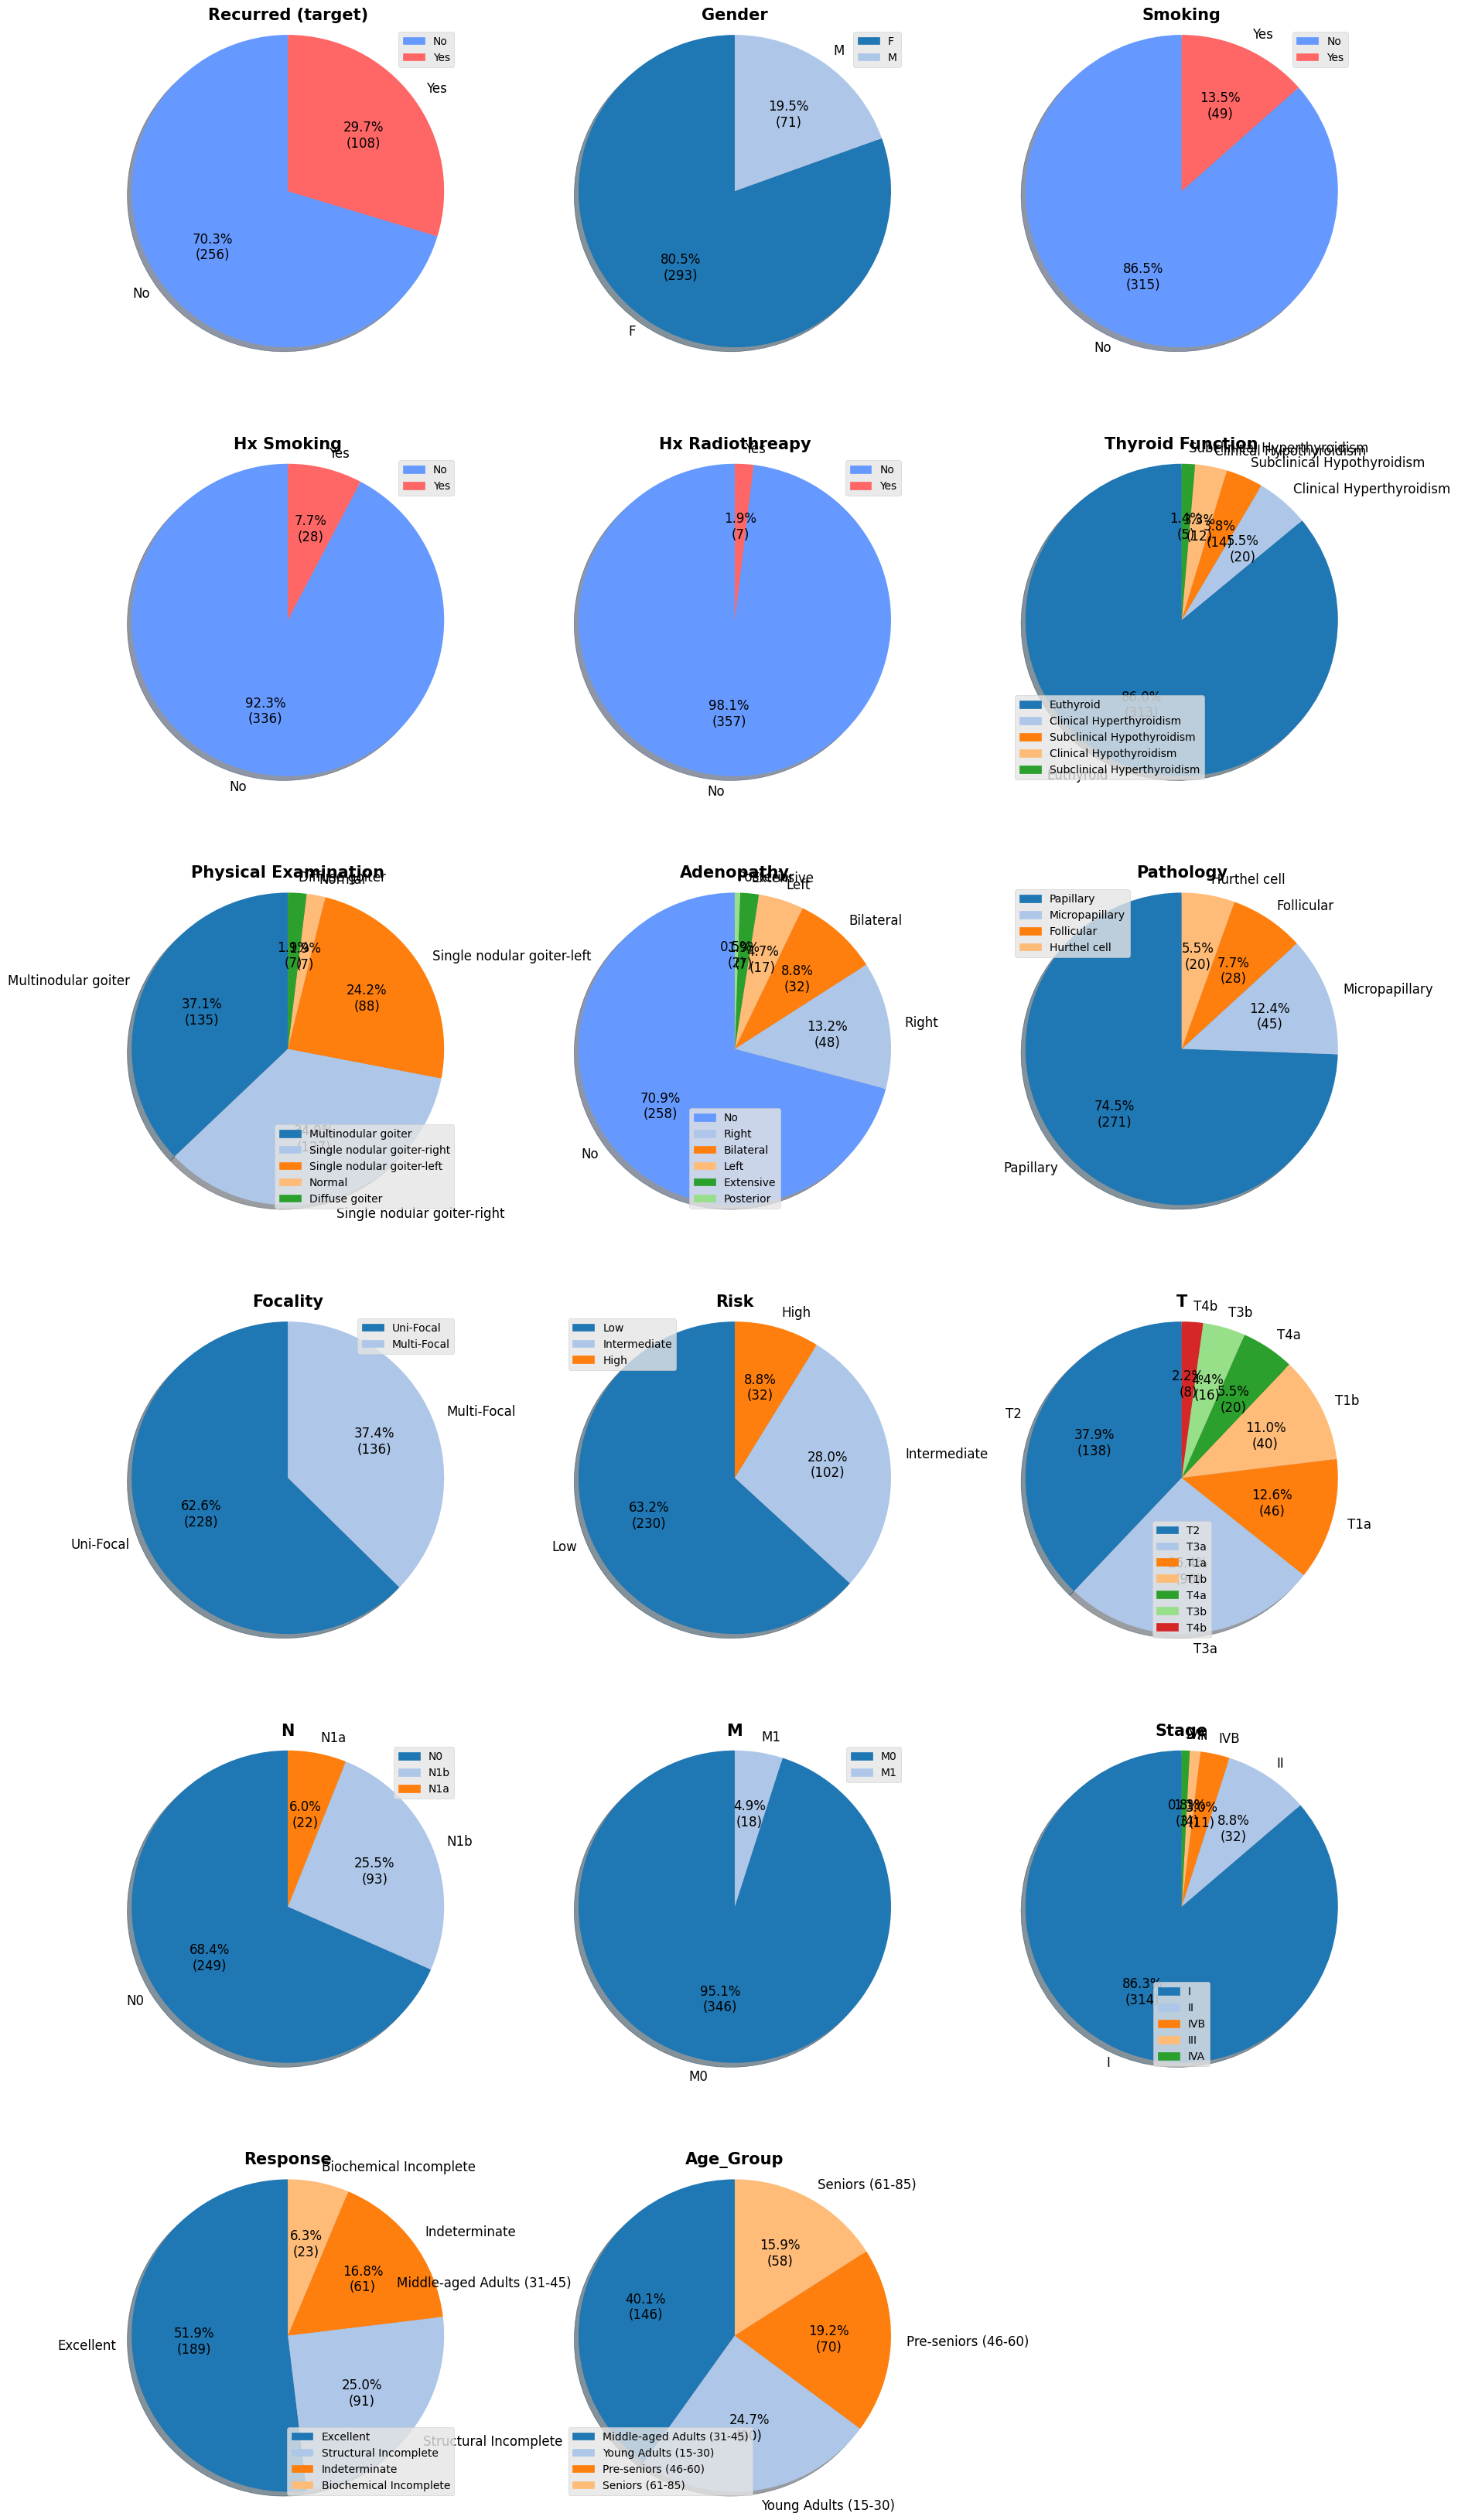

In [9]:
# Visualize Categorical Columns ( Pie Chart )
categorical_features = categorical_columns.columns.to_list()
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

yes_color = '#FF6666'  
no_color = '#6699FF'  

if target in categorical_features:
    categorical_features.insert(0, categorical_features.pop(categorical_features.index(target)))

fig, ax = plt.subplots(nrows=(len(categorical_features) // 3) + 1, ncols=3, figsize=(20, 40))
ax = ax.flat

for i, cat_feat in enumerate(categorical_features):
    df_class = df[cat_feat].value_counts()
    labels = df_class.index.tolist()
    values = df_class.values.tolist()
    unique_labels = len(labels)  
    colors = [yes_color if label == 'Yes' else no_color if label == 'No' else plt.cm.tab20(j % 20) for j, label in enumerate(labels)]
    
    legend_elements = [patches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
    legend_elements = sorted(legend_elements, key=lambda x: labels[legend_elements.index(x)] != 'Yes', reverse=True)

    ax[i].pie(values, labels=labels, autopct=autopct_fun(values), shadow=True, startangle=90,
              colors=colors, textprops={'fontsize': 12})
    ax[i].set_title(f"{cat_feat}{' (target)' if cat_feat == target else ''}", fontsize=15, fontweight="bold")
    ax[i].axis('equal')
    ax[i].legend(handles=legend_elements, loc='best')

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()



<a id="PreProcessing"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 3 |</span><span style='color: #9B60A;'> Pre-Processing</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this phase, we initiate the process by labeling our data, assigning clear, identifiable tags to each record based on its characteristics and outcomes. Following this, we'll split the dataset into training and testing sets, a critical step to validate the performance of our models unbiasedly. Next, we apply one-hot encoding to convert categorical variables into a format that can be provided to ML algorithms, ensuring no implicit ordering is introduced. Finally, we will scale numerical features to normalize their range and distribution, enhancing model accuracy and efficiency. This comprehensive pre-processing ensures our dataset is optimally prepared for effective machine learning analysis.
</div>


<a id="Label"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.1 |</span><span style='color:#9B60A1;'> Pre-processing ( Labelling )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [10]:
# Label target

labels = df[target].unique()

# Sort labels alphabetically
labels.sort()

# Create a dictionary
label_dict = {label: i for i, label in enumerate(labels)}

print(label_dict)



{'No': 0, 'Yes': 1}


In [11]:
df[target] = df[target].map(label_dict)

<a id="Split"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.2 |</span><span style='color:#9B60A1;'> Pre-processing ( Splitting )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [12]:
X = df.drop([target], axis=1)
y = df[target]

SEED = 42

X_train, X_test, y_train, y_test = tts(X, 
                                       y, 
                                       test_size = 0.125, 
                                       random_state = SEED,
                                      stratify = y)

In [13]:
reverse_label_dict = {v: k for k, v in label_dict.items()}
y_train_named = y_train.map(reverse_label_dict)
y_test_named = y_test.map(reverse_label_dict)

# Count the label distributions for training and test sets
train_label_distribution = y_train_named.value_counts()
test_label_distribution = y_test_named.value_counts()

# Merge training and test label distributions into a single DataFrame
label_distribution = pd.concat([train_label_distribution, test_label_distribution], axis=1, keys=['Count (Training)', 'Count (Test)'])

# Show the label distributions for training and test sets
print("Label Distribution in Training and Test Sets:")
display(label_distribution)

Label Distribution in Training and Test Sets:


,Count (Training),Count (Test)
Recurred,,
No,224,32
Yes,94,14


<a id="OneHot"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.3 |</span><span style='color:#9B60A1;'> Pre-processing ( One-hot Encoding )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [14]:
# One-Hot-Encoding
categorical_features = df.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([('ohe', OneHotEncoder(drop = 'first', 
                                                        sparse_output = False, 
                                                        handle_unknown = "ignore"), 
                                   categorical_features)], 
                                 remainder = 'passthrough', 
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

<a id="Scale"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.4 |</span><span style='color:#9B60A1;'> Pre-processing ( Scaling )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [15]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prep)
X_test_scaled = scaler.transform(X_test_prep)

<a id="BestML"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 4 |</span><span style='color: #9B60A;'> Finding Best ML Model</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this critical phase, we begin with our baseline model, LinearRegression, to set a standard for comparison. Following this, we systematically evaluate a series of advanced machine learning models to identify the most effective approach for our dataset. This includes:
<ul>
<li>RandomForestClassifier,</li>
<li>ExtraTreesClassifier,</li>
<li>XGBClassifier,</li>
<li>LGBMClassifier, and</li>
<li>CatBoostClassifier.</li>
</ul>
Each model is rigorously trained and tested using our pre-processed data, with performance metrics such as accuracy meticulously recorded for both training and test datasets.

Subsequent to training, we compile the accuracy scores into a comprehensive DataFrame, facilitating a clear, comparative analysis between models. This allows us to visualize their performance through a structured bar chart, highlighting the differences in accuracy between the training and testing phases for each classifier. This meticulous approach ensures we select the most suitable model, balancing both robustness and reliability, ultimately enhancing our predictive capabilities.

</div>


<a id="LR"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.1 |</span><span style='color:#9B60A1;'> Finding Best ML Model ( Logistic Regression )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [16]:
# Logistic Regression
lr = LogisticRegression(random_state=SEED, multi_class='ovr', max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_test):.4f}")

Accuracy Train: 0.9748
Accuracy Test: 1.0000


<a id="OtherModels"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.2 |</span><span style='color:#9B60A1;'> Finding Best ML Model ( Alternative Models )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [17]:
# ML models
clf1 = RandomForestClassifier(random_state = SEED, n_jobs = -1)
clf2 = ExtraTreesClassifier(bootstrap = True, n_jobs = -1, random_state = SEED)
clf3 = XGBClassifier(random_state = SEED)
clf4 = LGBMClassifier(random_state = SEED, n_jobs = -1)
clf5 = CatBoostClassifier(random_state = SEED, verbose = 0)

models_list = [clf1, clf2, clf3, clf4, clf5]

In [18]:
# Training

accuracy_train = {}
accuracy_test = {}

for model in tqdm(models_list):
    name = type(model).__name__
    model.fit(X_train_prep, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    accuracy_train[name] = accuracy_score(y_train, y_pred_train)
    accuracy_test[name] = accuracy_score(y_test, y_pred_test)
    print(f'* {name} finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

* RandomForestClassifier finished.
* ExtraTreesClassifier finished.
* XGBClassifier finished.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 94, number of negative: 224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295597 -> initscore=-0.868351
[LightGBM] [Info] Start training from score -0.868351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

<a id="Comparison"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.3 |</span><span style='color:#9B60A1;'> Finding Best ML Model ( Comparison )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

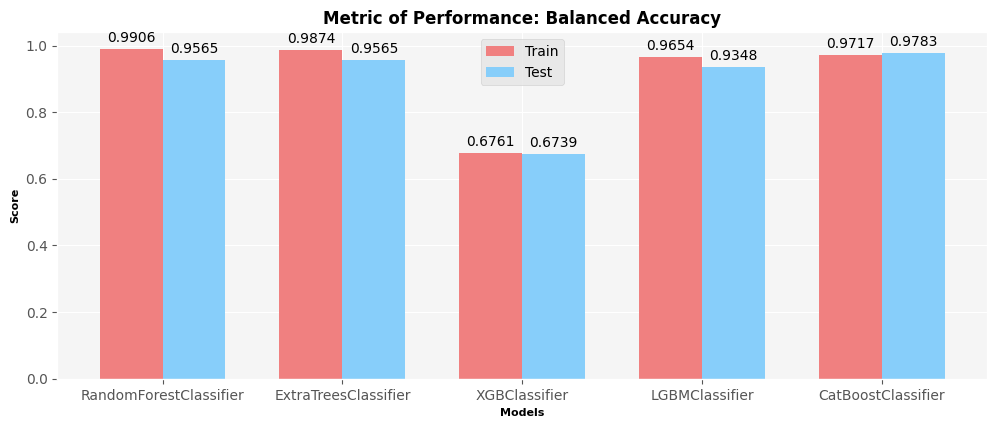

In [19]:
# Create DataFrame from dictionary for train and test metrics
metric_train = pd.DataFrame.from_dict(accuracy_train, orient='index')
metric_train = metric_train.rename(columns={0: 'Train'})
metric_test = pd.DataFrame.from_dict(accuracy_test, orient='index')
metric_test = metric_test.rename(columns={0: 'Test'})

# Create subplots
fig, ax = plt.subplots(figsize=(12, 4.5))

# Get labels, train and test values
labels = metric_train.index.to_list()
values_train = metric_train.iloc[:, 0].to_list()
values_test = metric_test.iloc[:, 0].to_list()
x = np.arange(len(labels))
width = 0.35

# Plot bars for train and test metrics
rects1 = ax.bar(x=x - width / 2, height=values_train, width=width, label='Train', color='lightcoral')
rects2 = ax.bar(x=x + width / 2, height=values_test, width=width, label='Test', color='lightskyblue')

# Function to label bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text=f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center",
                    va="bottom")

# Call autolabel function for train and test bars
autolabel(rects1)
autolabel(rects2)

# Add legend, title, and axis labels
ax.legend()
ax.set_title("Metric of Performance: Balanced Accuracy", fontsize=12, fontweight="bold", color="black")
ax.set_ylabel("Score", fontsize=8, fontweight="bold", color="black")
ax.set_xlabel("Models", fontsize=8, fontweight="bold", color="black")
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set background color of the plot
ax.set_facecolor('whitesmoke')

# Show the plot
plt.show()

# Evaluation for the ML Model with The Best Performance

<a id="Evaluation"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 5 |</span><span style='color: #9B60A;'> Evaluation for the ML Model with the Best Performance</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<a id="OtherModels"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 4.2 |</span><span style='color:#9B60A1;'> Finding Best ML Model ( Alternative Models )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Approach:</font></h2>

In this final phase, we assess the performance of our top-performing model, Logistic Regression, which achieved the best test scores. This comprehensive evaluation includes:

<h3>Predictions:</h3>
Predictive outcomes were generated for both training and testing datasets using the scaled features to ensure accuracy and consistency in evaluation.

<h3>Classification Report:</h3>
Detailed classification reports provide insights into the model's predictive precision, recall, and F1-score for each class, allowing us to understand its performance depth on both training and test data.

<h3>Confusion Matrices:</h3>
Visual representations in the form of confusion matrices offer a clear picture of the model's classification accuracy, highlighting the true positives, false positives, true negatives, and false negatives.

<h3>Feature Importances:</h3>
An analysis of feature importances gives an understanding of which variables contribute most significantly to the model's predictions, aiding in the interpretation and further refinement of the model.

This structured approach ensures a holistic understanding of the model's effectiveness and areas for improvement, guiding future enhancements and applications.

</div>

<a id="Predictions"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 5.1 |</span><span style='color:#9B60A1;'> Evaluation for the ML Model with the Best Performance ( Predictions )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [20]:
# Predictions
best_classifier = lr # Logistic regression achieve the best test scores

y_pred_train_final = best_classifier.predict(X_train_scaled)
y_pred_test_final = best_classifier.predict(X_test_scaled)

<a id="ClassificationReport"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 5.2 |</span><span style='color:#9B60A1;'> Evaluation for the ML Model with the Best Performance ( Classification Report )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [21]:
# Classification Report 

print("##" * 30)
print(" " * 12, "Classification Report Train")
print("##" * 30)
print(classification_report(y_train, y_pred_train_final))
print("")

print("##" * 30)
print(" " * 12, "Classification Report Test")
print("##" * 30)
print(classification_report(y_test, y_pred_test_final))

############################################################
             Classification Report Train
############################################################
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       224
           1       0.98      0.94      0.96        94

    accuracy                           0.97       318
   macro avg       0.98      0.96      0.97       318
weighted avg       0.97      0.97      0.97       318


############################################################
             Classification Report Test
############################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        14

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



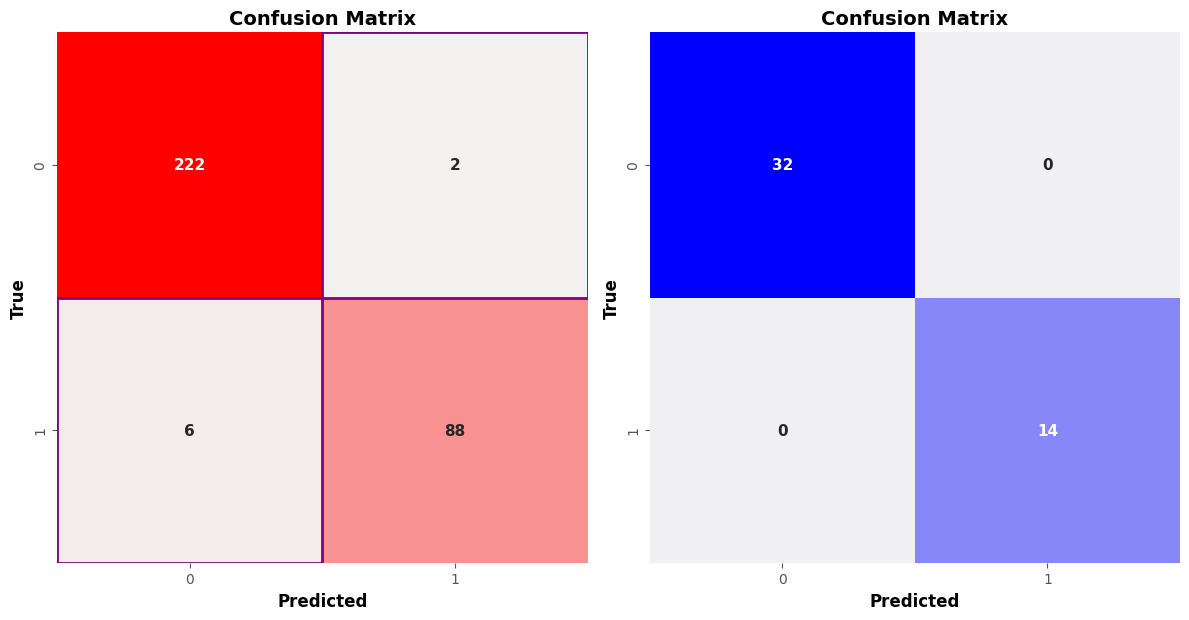

In [22]:
# Confusion Matrices

# Calculate the Confusion Matrices
cf_mx_train = confusion_matrix(y_train, y_pred_train_final)
cf_mx_test = confusion_matrix(y_test, y_pred_test_final)

# Color palettes
palette_train = sns.light_palette("red", as_cmap=True)
palette_test = sns.light_palette("blue", as_cmap=True)

# 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Create heatmaps
sns.heatmap(cf_mx_train, cmap=palette_train, annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='', cbar=False, square=True, ax=axs[0])
sns.heatmap(cf_mx_test, cmap=palette_test, annot=True, annot_kws={'fontsize': 11, 'fontweight': 'bold'}, fmt='', cbar=False, square=True, ax=axs[1])

# Check the values in non-diagonal squares and make them purple if different from zero
for ax, cf_mx in zip(axs, [cf_mx_train, cf_mx_test]):
    for i in range(len(cf_mx)):
        for j in range(len(cf_mx)):
            if i != j and cf_mx[i, j] != 0:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='purple', lw=2))

# Set axis labels and titles
for ax in axs:
    ax.set_xlabel('Predicted', fontsize=12, fontweight="bold", color="black")
    ax.set_ylabel('True', fontsize=12, fontweight="bold", color="black")
    ax.set_title('Confusion Matrix', fontsize=14, fontweight="bold", color="black")

plt.tight_layout()
plt.show()


<a id="FeatureImportances"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 5.3 |</span><span style='color:#9B60A1;'> Evaluation for the ML Model with the Best Performance ( Feature Importances )</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

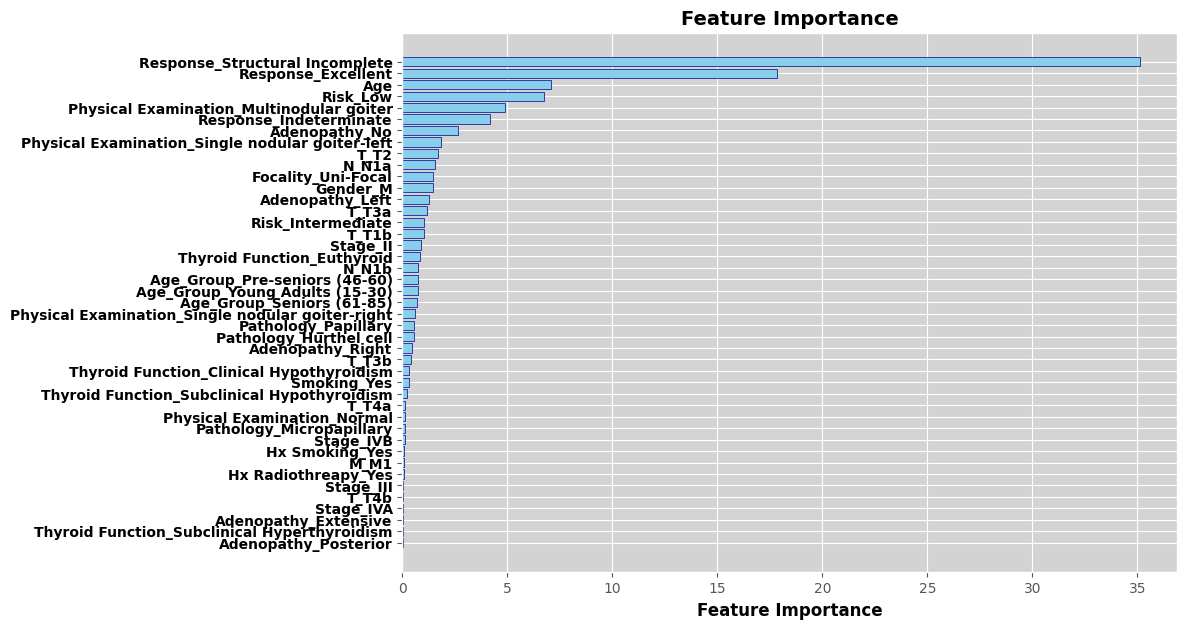

In [23]:
# Feature importances 

# Get the feature importance values and names
feature_importance = clf5.feature_importances_
feature_names = X_test_prep.columns

# Sort by importance
sorted_idx = np.argsort(feature_importance)

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Horizontal bar plot
bars = plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue', edgecolor='darkblue')

for bar in bars:
    bar.set_edgecolor('darkblue')

# Labels on the Y-axis
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], fontsize=10, fontweight='bold', color='black')

# Labels-titles
plt.xlabel("Feature Importance", fontsize=12, fontweight='bold', color='black')
plt.title('Feature Importance', fontsize=14, fontweight='bold', color='black')

# Background
plt.gca().set_facecolor('lightgrey')

plt.show()